# **Import Library yang dibutuhkan**

In [ ]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# **Load Dataset**

In [ ]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Moovit_1.csv")
df.head()

,userName,score,at,content
0,endang mudjiati,3,2024-06-23 00:36:09,Coba dulu deh . .
1,Rafik Tiya,5,2024-06-22 14:58:28,Nama saya Ramandani
2,Muhammad Tigran,1,2024-06-21 11:35:08,Managemen iklan yang sangat jelek. Busuk. Bany...
3,Eka Violeta Ketaren,3,2024-06-21 04:12:50,Baguss
4,Nur Malicha,5,2024-06-20 04:57:30,bguss bngt dan sangat membantu untuk mencari r...


In [ ]:
# Menampilkan Column Content, Username, dan at.

df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Coba dulu deh . .,endang mudjiati,2024-06-23 00:36:09
1,Nama saya Ramandani,Rafik Tiya,2024-06-22 14:58:28
2,Managemen iklan yang sangat jelek. Busuk. Bany...,Muhammad Tigran,2024-06-21 11:35:08
3,Baguss,Eka Violeta Ketaren,2024-06-21 04:12:50
4,bguss bngt dan sangat membantu untuk mencari r...,Nur Malicha,2024-06-20 04:57:30
...,...,...,...
1995,Lumayan sipp,Pengguna Google,2018-07-24 03:44:49
1996,Sangat membantu...,Pengguna Google,2018-07-23 13:59:22
1997,Josss,Pengguna Google,2018-07-21 13:50:48
1998,Good,Pengguna Google,2018-07-20 16:44:28


In [ ]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   2000 non-null   object
 1   userName  2000 non-null   object
 2   at        2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB


In [ ]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content,userName,at
count,2000,2000,2000
unique,1593,1291,2000
top,Sangat membantu,Pengguna Google,2024-06-23 00:36:09
freq,82,707,1


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [ ]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(2000, 3)

In [ ]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [ ]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [ ]:
# Menghapus data yang kosong

df = df.dropna()

In [ ]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [ ]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(1593, 3)

In [ ]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [ ]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [ ]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,coba dulu deh,endang mudjiati,2024-06-23 00:36:09
1,nama saya ramandani,Rafik Tiya,2024-06-22 14:58:28
2,managemen iklan yang sangat jelek busuk banyak...,Muhammad Tigran,2024-06-21 11:35:08
3,baguss,Eka Violeta Ketaren,2024-06-21 04:12:50
4,bguss bngt dan sangat membantu untuk mencari r...,Nur Malicha,2024-06-20 04:57:30
...,...,...,...
1990,terimakasih moovit karna mu aku tidak nyasar,Pengguna Google,2018-08-01 14:01:49
1992,oke sip lah komplit,Pengguna Google,2018-07-31 09:07:48
1995,lumayan sipp,Pengguna Google,2018-07-24 03:44:49
1997,josss,Pengguna Google,2018-07-21 13:50:48


# **Normalization**

In [ ]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile",
        "bguss" : "bagus"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,coba dulu deh,endang mudjiati,2024-06-23 00:36:09
1,nama saya ramandani,Rafik Tiya,2024-06-22 14:58:28
2,managemen iklan yang sangat jelek busuk banyak...,Muhammad Tigran,2024-06-21 11:35:08
3,baguss,Eka Violeta Ketaren,2024-06-21 04:12:50
4,bagus banget dan sangat membantu untuk mencari...,Nur Malicha,2024-06-20 04:57:30
...,...,...,...
1990,terimakasih moovit karna mu aku tidak nyasar,Pengguna Google,2018-08-01 14:01:49
1992,oke sip lah komplit,Pengguna Google,2018-07-31 09:07:48
1995,lumayan sipp,Pengguna Google,2018-07-24 03:44:49
1997,josss,Pengguna Google,2018-07-21 13:50:48


# **Stopwords**

In [ ]:
# Menginstall Library Sastrawi

!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00


In [ ]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,coba dulu deh,endang mudjiati,2024-06-23 00:36:09
1,nama ramandani,Rafik Tiya,2024-06-22 14:58:28
2,managemen iklan sangat jelek busuk banyak ikla...,Muhammad Tigran,2024-06-21 11:35:08
3,baguss,Eka Violeta Ketaren,2024-06-21 04:12:50
4,bagus banget sangat membantu mencari rutee kem...,Nur Malicha,2024-06-20 04:57:30
...,...,...,...
1990,terimakasih moovit karna mu aku nyasar,Pengguna Google,2018-08-01 14:01:49
1992,oke sip lah komplit,Pengguna Google,2018-07-31 09:07:48
1995,lumayan sipp,Pengguna Google,2018-07-24 03:44:49
1997,josss,Pengguna Google,2018-07-21 13:50:48


# **Tokenize**

In [ ]:
# Tokenize

tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                       [coba, dulu, deh]
1                                       [nama, ramandani]
2       [managemen, iklan, sangat, jelek, busuk, banya...
3                                                [baguss]
4       [bagus, banget, sangat, membantu, mencari, rut...
                              ...                        
1990        [terimakasih, moovit, karna, mu, aku, nyasar]
1992                             [oke, sip, lah, komplit]
1995                                      [lumayan, sipp]
1997                                              [josss]
1999                                              [trims]
Name: content, Length: 1593, dtype: object

# **Stemming**

In [ ]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Moovit_1.csv', index = False)


In [ ]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Moovit_1.csv', encoding = 'latin1')
df_clean

,content
0,coba dulu deh
1,nama ramandani
2,managemen iklan sangat jelek busuk banyak ikla...
3,baguss
4,bagus banget sangat bantu cari rutee kemarin i...
...,...
1588,terimakasih moovit karna mu aku nyasar
1589,oke sip lah komplit
1590,lumayan sipp
1591,josss


# **Translate**

In [ ]:
# Menginstall Library easynmt

!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3

In [ ]:
import pandas as pd
from easynmt import EasyNMT

In [ ]:
# Load Data Hasil Stemming

df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Moovit_1.csv', encoding='latin1')

In [ ]:
# Menentukan Asal & Target Bahasa yang akan diterjemahkan

source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [ ]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 8.05MB/s]                   


In [ ]:
# Imputing NaN Values

df2 = df_clean.fillna(method = 'pad')
df2

,content
0,coba dulu deh
1,nama ramandani
2,managemen iklan sangat jelek busuk banyak ikla...
3,baguss
4,bagus banget sangat bantu cari rutee kemarin i...
...,...
1588,terimakasih moovit karna mu aku nyasar
1589,oke sip lah komplit
1590,lumayan sipp
1591,josss


In [ ]:
# Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Moovit_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [ ]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Moovit_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,coba dulu deh,Give it a try.
1,1,nama ramandani,ramandani name
2,2,managemen iklan sangat jelek busuk banyak ikla...,Advertising management is bad. Lots of commerc...
3,3,baguss,That's good.
4,4,bagus banget sangat bantu cari rutee kemarin i...,It's great. Help find route yesterday. An inte...
...,...,...,...
1588,1588,terimakasih moovit karna mu aku nyasar,"Thanks to you, Moovit, I'm lost."
1589,1589,oke sip lah komplit,"Okay, let's get it over with."
1590,1590,lumayan sipp,Not bad.
1591,1591,josss,josss


# **Labeling**

In [ ]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Moovit_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,coba dulu deh,Give it a try.
1,1,nama ramandani,ramandani name
2,2,managemen iklan sangat jelek busuk banyak ikla...,Advertising management is bad. Lots of commerc...
3,3,baguss,That's good.
4,4,bagus banget sangat bantu cari rutee kemarin i...,It's great. Help find route yesterday. An inte...
...,...,...,...
1588,1588,terimakasih moovit karna mu aku nyasar,"Thanks to you, Moovit, I'm lost."
1589,1589,oke sip lah komplit,"Okay, let's get it over with."
1590,1590,lumayan sipp,Not bad.
1591,1591,josss,josss


In [ ]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK

!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
# Import Library yang dibutuhkan

import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Labeling With TextBlob

data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 803
Netral = 592
Negatif = 198

Total Data Seluruhnya : 1593


In [ ]:
# Melihat Status Sentimen

df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,coba dulu deh,Give it a try.,Netral
1,1,nama ramandani,ramandani name,Netral
2,2,managemen iklan sangat jelek busuk banyak ikla...,Advertising management is bad. Lots of commerc...,Positif
3,3,baguss,That's good.,Positif
4,4,bagus banget sangat bantu cari rutee kemarin i...,It's great. Help find route yesterday. An inte...,Positif
...,...,...,...,...
1588,1588,terimakasih moovit karna mu aku nyasar,"Thanks to you, Moovit, I'm lost.",Positif
1589,1589,oke sip lah komplit,"Okay, let's get it over with.",Positif
1590,1590,lumayan sipp,Not bad.,Positif
1591,1591,josss,josss,Netral


In [ ]:
# Menghapus Colum Unnamed: 0

data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,coba dulu deh,Give it a try.,Netral
1,nama ramandani,ramandani name,Netral
2,managemen iklan sangat jelek busuk banyak ikla...,Advertising management is bad. Lots of commerc...,Positif
3,baguss,That's good.,Positif
4,bagus banget sangat bantu cari rutee kemarin i...,It's great. Help find route yesterday. An inte...,Positif
...,...,...,...
1588,terimakasih moovit karna mu aku nyasar,"Thanks to you, Moovit, I'm lost.",Positif
1589,oke sip lah komplit,"Okay, let's get it over with.",Positif
1590,lumayan sipp,Not bad.,Positif
1591,josss,josss,Netral


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



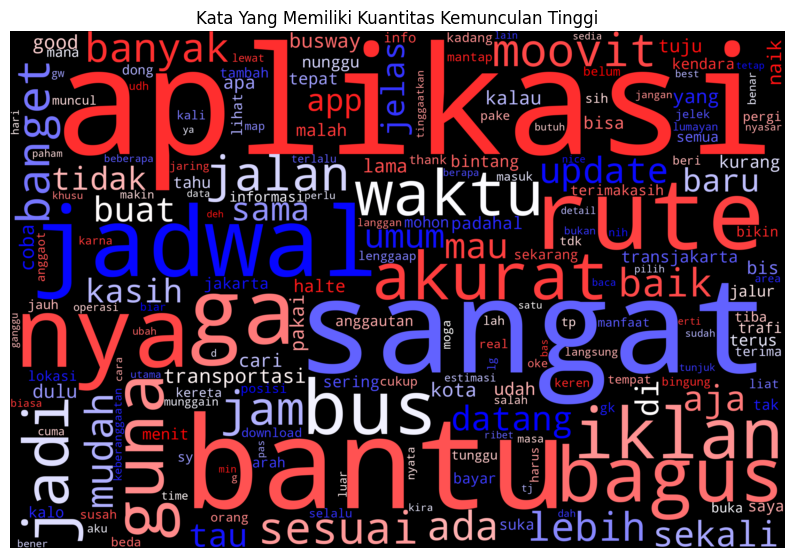

In [ ]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


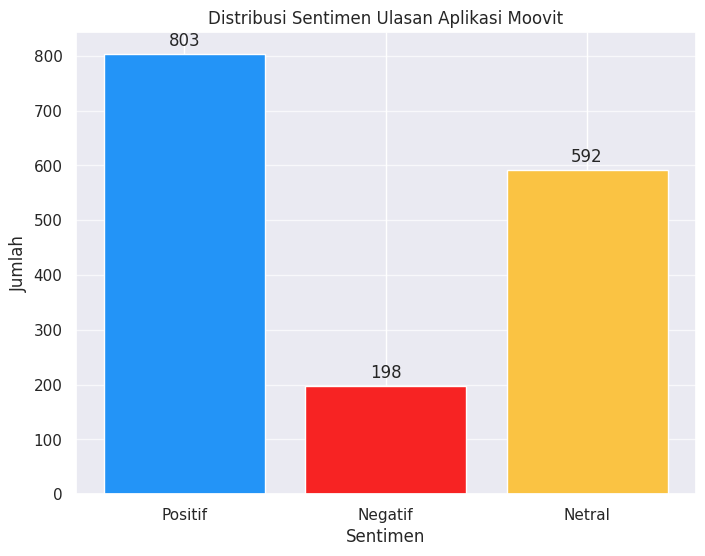

In [81]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Moovit")


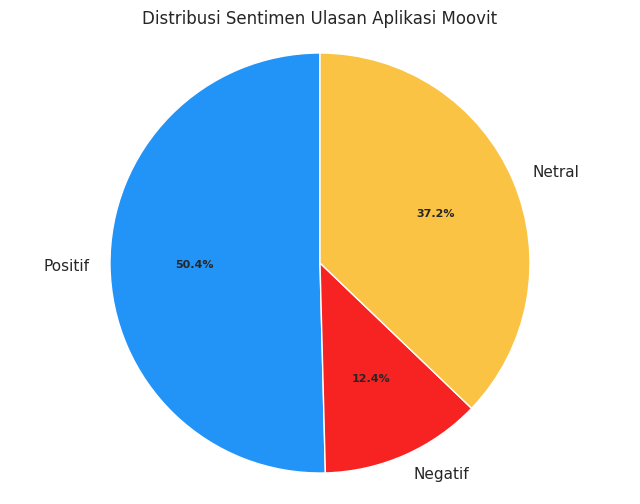

In [82]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Moovit")

In [ ]:
# Menghapus Sentimen Netral

data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
2,managemen iklan sangat jelek busuk banyak ikla...,Advertising management is bad. Lots of commerc...,Positif
3,baguss,That's good.,Positif
4,bagus banget sangat bantu cari rutee kemarin i...,It's great. Help find route yesterday. An inte...,Positif
6,banyak tempat kenal aplikasi tidak tahu aplika...,There's so many places where the app doesn't k...,Positif
7,baru instal muncul iklan nyari rute muncul ikl...,new installs appear ads find routes appear ad ...,Positif
...,...,...,...
1586,ntap,FAST,Positif
1587,blm prnh pakesmoga lancar,"fontcolor="" # FFFF00""not yet fontcolor="" # FFF...",Positif
1588,terimakasih moovit karna mu aku nyasar,"Thanks to you, Moovit, I'm lost.",Positif
1589,oke sip lah komplit,"Okay, let's get it over with.",Positif


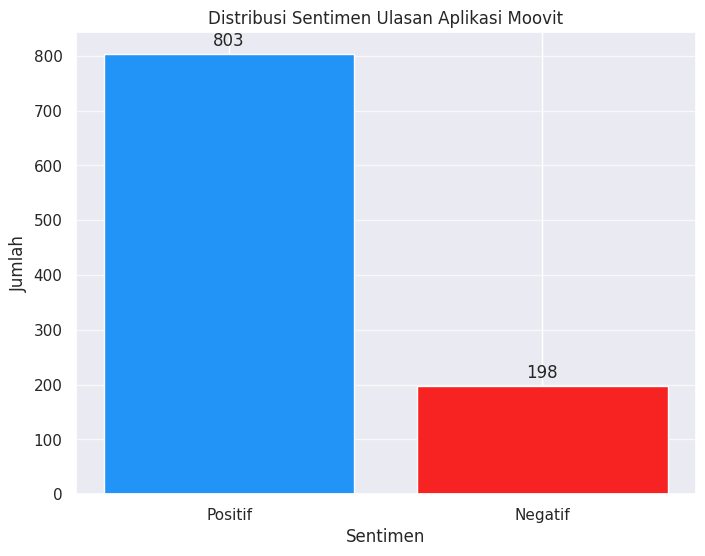

In [83]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Moovit")


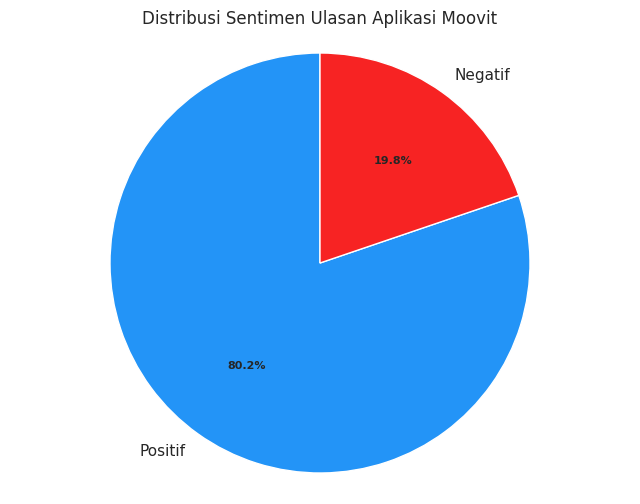

In [84]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Moovit")

In [ ]:
# Replace Data Sentimen

data = data.replace({'Positif':0, 'Negatif':1})
data

,content,content_en,sentimen
2,managemen iklan sangat jelek busuk banyak ikla...,Advertising management is bad. Lots of commerc...,0
3,baguss,That's good.,0
4,bagus banget sangat bantu cari rutee kemarin i...,It's great. Help find route yesterday. An inte...,0
6,banyak tempat kenal aplikasi tidak tahu aplika...,There's so many places where the app doesn't k...,0
7,baru instal muncul iklan nyari rute muncul ikl...,new installs appear ads find routes appear ad ...,0
...,...,...,...
1586,ntap,FAST,0
1587,blm prnh pakesmoga lancar,"fontcolor="" # FFFF00""not yet fontcolor="" # FFF...",0
1588,terimakasih moovit karna mu aku nyasar,"Thanks to you, Moovit, I'm lost.",0
1589,oke sip lah komplit,"Okay, let's get it over with.",0


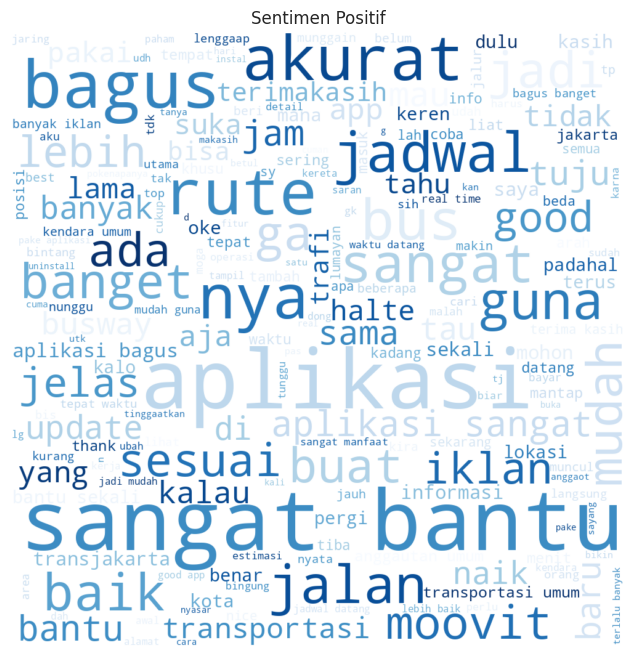

In [ ]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data[data['sentimen'] == 0]
data_negatif = data[data['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

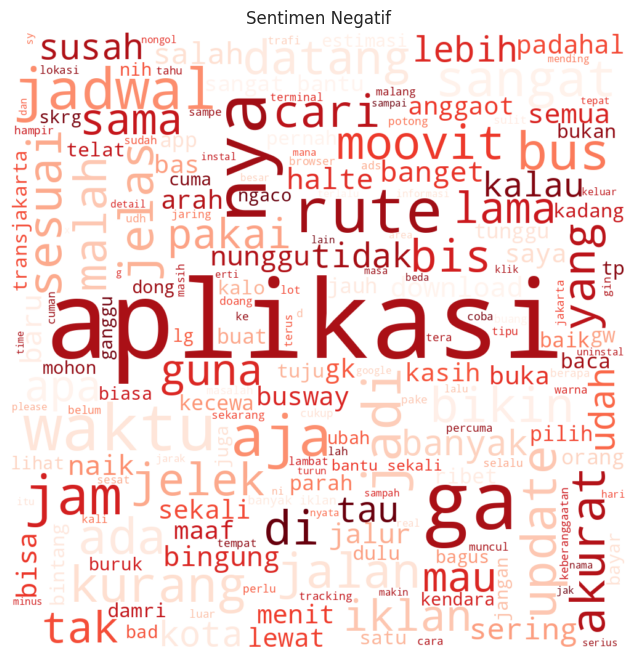

In [ ]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

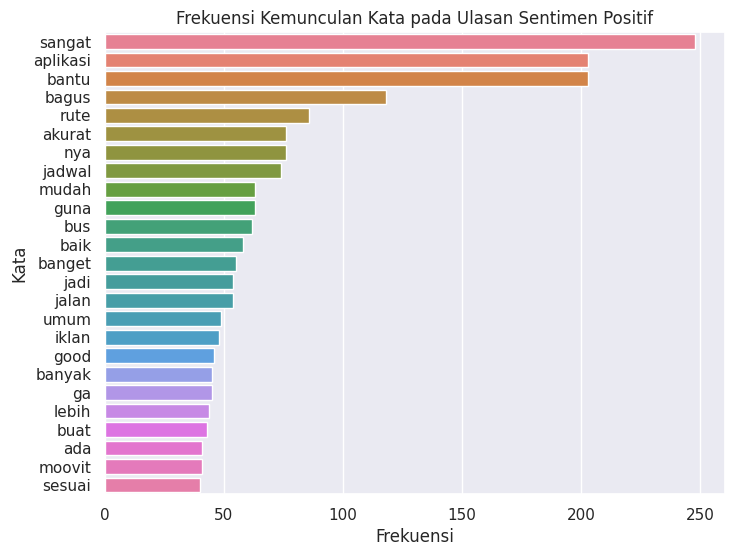

In [ ]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data[data['sentimen'] == 0]['content'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 25
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [ ]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
  sangat        248
aplikasi        203
   bantu        203
   bagus        118
    rute         86
  akurat         76
     nya         76
  jadwal         74
   mudah         63
    guna         63
     bus         62
    baik         58
  banget         55
    jadi         54
   jalan         54
    umum         49
   iklan         48
    good         46
  banyak         45
      ga         45
   lebih         44
    buat         43
     ada         41
  moovit         41
  sesuai         40


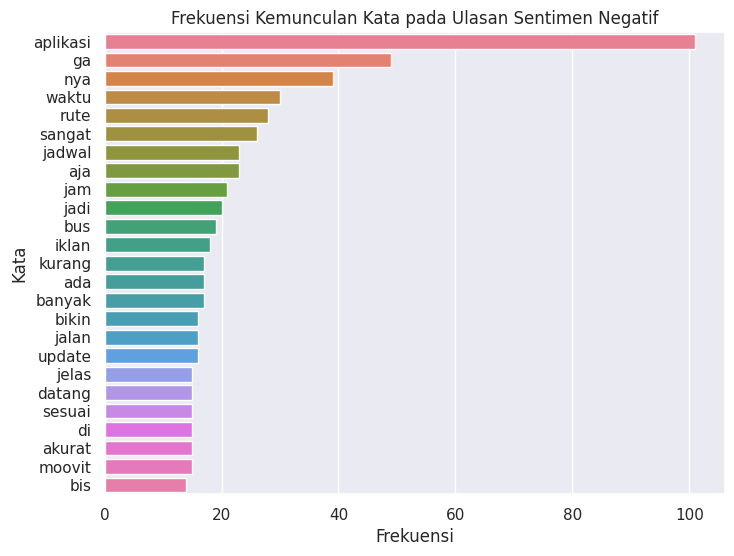

In [ ]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data[data['sentimen'] == 1]['content'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 25
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [ ]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

    kata  frekuensi
aplikasi        101
      ga         49
     nya         39
   waktu         30
    rute         28
  sangat         26
  jadwal         23
     aja         23
     jam         21
    jadi         20
     bus         19
   iklan         18
  kurang         17
     ada         17
  banyak         17
   bikin         16
   jalan         16
  update         16
   jelas         15
  datang         15
  sesuai         15
      di         15
  akurat         15
  moovit         15
     bis         14


In [ ]:
# Menghitung Jumlah Sentimen Positif, Negatif

data['sentimen'].value_counts()

sentimen
0    803
1    198
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [ ]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

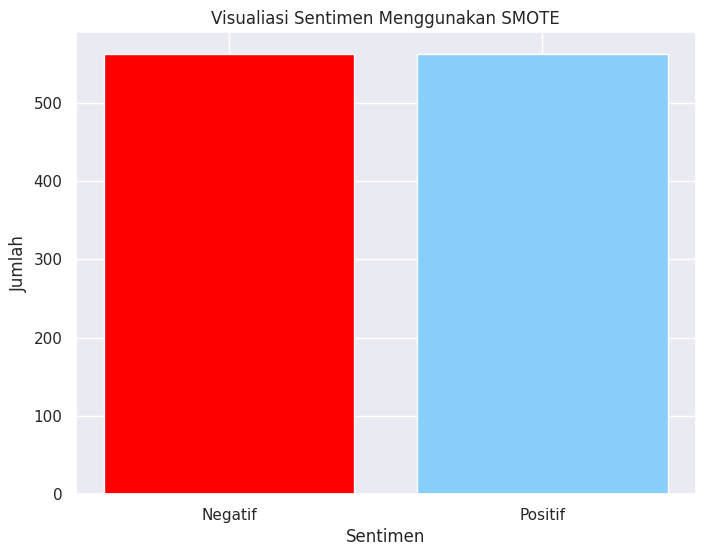

In [ ]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [ ]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Membangun Model Naive Bayes Classifier

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [ ]:
y_pred = naive_bayes.predict(X_test_vec)

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [ ]:
# Classification Report

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Positif', 'Negatif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.8305647840531561

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Positif       0.92      0.86      0.89       241
     Negatif       0.56      0.72      0.63        60

    accuracy                           0.83       301
   macro avg       0.74      0.79      0.76       301
weighted avg       0.85      0.83      0.84       301



In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[207  34]
 [ 17  43]]

True Positives (TP) =  207

True Negatives (TN) =  43

False Positives (FP) =  34

False Negatives (FN) =  17

Accuracy =  0.8305647840531561


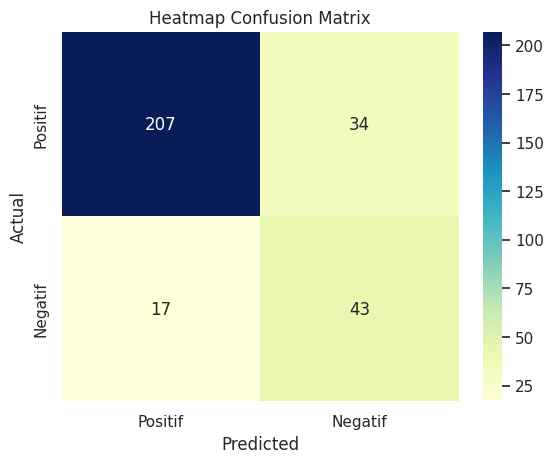

In [ ]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif','Negatif'],
                         index=['Positif','Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [ ]:
# Slicing Confusion Matrix

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [ ]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8306


In [ ]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1694


# **Testing**

In [ ]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Dapat rekomendasi dari teman. Beliau bilang aplikasi ini akurat dan sangat membantu. Dan itu benar. Saya menggunakan ini untuk cek semua rute dan jenis KA yang ada di Indonesia. Tingkatkan terus fiturnya. Seperti update info keterlambatan KA di notifikasi sering hanya muncul semacam kode sandi saja. Mohon lebih pakai bahasa familiar saja agar mudah dimengerti 🤓 terimakasih Moovit
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 79.07%
Probabilitas: 79.07243628943887 %


In [ ]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Jangan di instal aplikasi Moovit sampah, banyak banget iklannya.
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 68.68%
Probabilitas: 68.68447944196373 %
